In [2]:
import pandas as pd
import numpy as np

In [3]:
movies = pd.read_csv('../in/movies.csv')

In [4]:
movies.head()

,movie_title,title_year,color,aspect_ratio,duration,language,country,duration.1,genres,content_rating,plot_keywords,director_name,actor_1_name,actor_2_name,actor_3_name,cast_total_facebook_likes,budget,imdb_score,gross
0,Avatar,2009.0,Color,1.78,178.0,English,USA,178.0,Action|Adventure|Fantasy|Sci-Fi,PG-13,avatar|future|marine|native|paraplegic,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,4834,237000000.0,7.9,760505847.0
1,Pirates of the Caribbean: At World's End,2007.0,Color,2.35,169.0,English,USA,169.0,Action|Adventure|Fantasy,PG-13,goddess|marriage ceremony|marriage proposal|pi...,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,48350,300000000.0,7.1,309404152.0
2,Spectre,2015.0,Color,2.35,148.0,English,UK,148.0,Action|Adventure|Thriller,PG-13,bomb|espionage|sequel|spy|terrorist,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,11700,245000000.0,6.8,200074175.0
3,The Dark Knight Rises,2012.0,Color,2.35,164.0,English,USA,164.0,Action|Thriller,PG-13,deception|imprisonment|lawlessness|police offi...,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,106759,250000000.0,8.5,448130642.0
4,Star Wars: Episode VII - The Force Awakens ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Documentary,NaN,NaN,Doug Walker,Doug Walker,Rob Walker,NaN,143,NaN,7.1,NaN


In [6]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   movie_title                5043 non-null   object 
 1   title_year                 4935 non-null   float64
 2   color                      5024 non-null   object 
 3   aspect_ratio               4714 non-null   float64
 4   duration                   5028 non-null   float64
 5   language                   5031 non-null   object 
 6   country                    5038 non-null   object 
 7   duration.1                 5028 non-null   float64
 8   genres                     5043 non-null   object 
 9   content_rating             4740 non-null   object 
 10  plot_keywords              4890 non-null   object 
 11  director_name              4939 non-null   object 
 12  actor_1_name               5036 non-null   object 
 13  actor_2_name               5030 non-null   objec

In [11]:
movies['duration'].equals(movies['duration.1'])

True

In [ ]:
movies = movies.drop('duration.1', axis=1)

In [33]:
movies_num = movies.select_dtypes(exclude='object')

In [34]:
movies_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   title_year                 4935 non-null   float64
 1   aspect_ratio               4714 non-null   float64
 2   duration                   5028 non-null   float64
 3   cast_total_facebook_likes  5043 non-null   int64  
 4   budget                     4551 non-null   float64
 5   imdb_score                 5043 non-null   float64
 6   gross                      4159 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 275.9 KB


<AxesSubplot:>

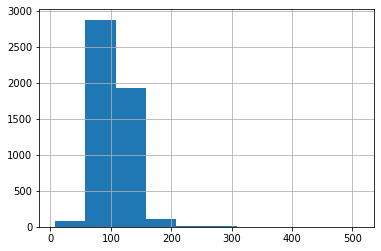

In [21]:
movies_num.duration.hist()

<AxesSubplot:>

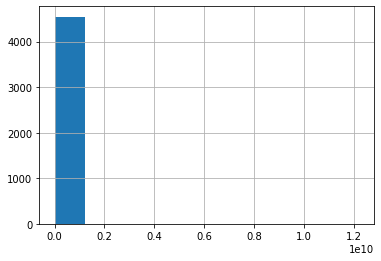

In [24]:
movies_num.budget.hist()

<AxesSubplot:>

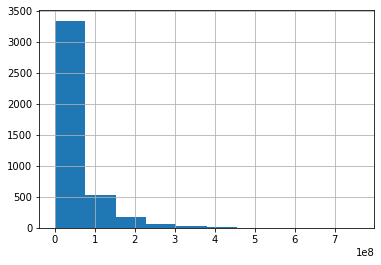

In [25]:
movies_num.gross.hist()

In [28]:
(movies_num.budget > 1e9).value_counts()

False    5037
True        6
Name: budget, dtype: int64

In [35]:
mask = (movies_num.budget > 1e9)
movies[mask]

,movie_title,title_year,color,aspect_ratio,duration,language,country,genres,content_rating,plot_keywords,director_name,actor_1_name,actor_2_name,actor_3_name,cast_total_facebook_likes,budget,imdb_score,gross
2323,Princess Mononoke,1997.0,Color,1.85,134.0,Japanese,Japan,Adventure|Animation|Fantasy,PG-13,anime|cult film|forest|princess|studio ghibli,Hayao Miyazaki,Minnie Driver,Jada Pinkett Smith,Billy Crudup,2710,2.400000e+09,8.4,2298191.0
2334,Steamboy,2004.0,Color,1.85,103.0,Japanese,Japan,Action|Adventure|Animation|Family|Sci-Fi|Thriller,PG-13,19th century|ball|boy|inventor|steam,Katsuhiro Ôtomo,William Hootkins,Robin Atkin Downes,Rosalind Ayres,991,2.127520e+09,6.9,410388.0
2988,The Host,2006.0,Color,1.85,110.0,Korean,South Korea,Comedy|Drama|Horror|Sci-Fi,R,daughter|han river|monster|river|seoul,Joon-ho Bong,Doona Bae,Kang-ho Song,Ah-sung Ko,1173,1.221550e+10,7.0,2201412.0
3005,Fateless,2005.0,Color,2.35,134.0,Hungarian,Hungary,Drama|Romance|War,R,bus|death|gay slur|hatred|jewish,Lajos Koltai,Marcell Nagy,Péter Fancsikai,Bálint Péntek,11,2.500000e+09,7.1,195888.0
3423,Akira,1988.0,Color,1.85,124.0,Japanese,Japan,Action|Animation|Sci-Fi,R,based on manga|biker gang|gifted child|post th...,Katsuhiro Ôtomo,Mitsuo Iwata,Takeshi Kusao,Tesshô Genda,28,1.100000e+09,8.1,439162.0
3859,Lady Vengeance,2005.0,Color,2.35,112.0,Korean,South Korea,Crime|Drama,R,cake|christian|lesbian sex|oral sex|pregnant s...,Chan-wook Park,Min-sik Choi,Yeong-ae Lee,Hye-jeong Kang,907,4.200000e+09,7.7,211667.0


In [36]:
thenumbers = pd.read_csv('../in/thenumbers.csv')
thenumbers.head()

,Unnamed: 0,movie_name,domestic_gross,movie_link,production_budget,release_date,worldwide_gross,movie_title
0,0,Avatar,760507625,http://www.the-numbers.com/movie/Avatar#tab=su...,425000000,12/18/2009,2783918982,Avatar
1,1,Star Wars Ep. VII: The Force Awakens,936662225,http://www.the-numbers.com/movie/Star-Wars-Ep-...,306000000,12/18/2015,2058662225,Star Wars: Episode VII - The Force Awakens ...
2,2,Pirates of the Caribbean: At World's End,309420425,http://www.the-numbers.com/movie/Pirates-of-th...,300000000,5/24/2007,963420425,Pirates of the Caribbean: At World's End
3,3,Spectre,200074175,http://www.the-numbers.com/movie/Spectre#tab=s...,300000000,11/6/2015,879620923,Spectre
4,4,The Dark Knight Rises,448139099,http://www.the-numbers.com/movie/Dark-Knight-R...,275000000,7/20/2012,1084439099,The Dark Knight Rises


In [44]:
movies_num = pd.concat([movies_num, movies.movie_title], axis=1)

In [45]:
thenumbers.dtypes

Unnamed: 0            int64
movie_name           object
domestic_gross        int64
movie_link           object
production_budget     int64
release_date         object
worldwide_gross       int64
movie_title          object
dtype: object

In [46]:
thenumbers = thenumbers.loc[:,['movie_title', 'worldwide_gross', 'production_budget']]

In [49]:
movies_v2 = pd.merge(thenumbers, movies_num, on='movie_title', how='left')

In [50]:
print(thenumbers.shape)
print(movies_v2.shape)

(4341, 3)
(4385, 10)


In [54]:
movies_v2.duplicated('movie_title').value_counts()

False    4341
True       44
dtype: int64

In [56]:
movies_v2 = movies_v2.drop_duplicates('movie_title')

In [57]:
movies_v2.shape

(4341, 10)

In [58]:
movies_v2.head()

,movie_title,worldwide_gross,production_budget,title_year,aspect_ratio,duration,cast_total_facebook_likes,budget,imdb_score,gross
0,Avatar,2783918982,425000000,2009.0,1.78,178.0,4834,237000000.0,7.9,760505847.0
1,Star Wars: Episode VII - The Force Awakens ...,2058662225,306000000,NaN,NaN,NaN,143,NaN,7.1,NaN
2,Pirates of the Caribbean: At World's End,963420425,300000000,2007.0,2.35,169.0,48350,300000000.0,7.1,309404152.0
3,Spectre,879620923,300000000,2015.0,2.35,148.0,11700,245000000.0,6.8,200074175.0
4,The Dark Knight Rises,1084439099,275000000,2012.0,2.35,164.0,106759,250000000.0,8.5,448130642.0


In [60]:
movies_v2 = movies_v2.drop(['budget', 'gross'], axis=1)

In [67]:
movies_v2.notna().apply(pd.Series.value_counts)

,movie_title,worldwide_gross,production_budget,title_year,aspect_ratio,duration,cast_total_facebook_likes,imdb_score
False,NaN,NaN,NaN,27,272,13,NaN,NaN
True,4341.0,4341.0,4341.0,4314,4069,4328,4341.0,4341.0


In [68]:
(movies_v2 != 0).apply(pd.Series.value_counts)

,movie_title,worldwide_gross,production_budget,title_year,aspect_ratio,duration,cast_total_facebook_likes,imdb_score
False,NaN,280,NaN,NaN,NaN,NaN,27,NaN
True,4341.0,4061,4341.0,4341.0,4341.0,4341.0,4314,4341.0


In [70]:
movies_v2 = movies_v2.loc[(movies_v2.worldwide_gross != 0),:]

In [72]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

In [73]:
movies_v2_title = movies_v2.movie_title

In [74]:
movies_v2 = movies_v2.drop('movie_title', axis=1)

In [77]:
movies_values = imputer.fit_transform(movies_v2)

In [78]:
movies_values

array([[2.78391898e+09, 4.25000000e+08, 2.00900000e+03, ...,
        1.78000000e+02, 4.83400000e+03, 7.90000000e+00],
       [2.05866222e+09, 3.06000000e+08, 2.00210263e+03, ...,
        1.08552703e+02, 1.43000000e+02, 7.10000000e+00],
       [9.63420425e+08, 3.00000000e+08, 2.00700000e+03, ...,
        1.69000000e+02, 4.83500000e+04, 7.10000000e+00],
       ...,
       [9.00000000e+02, 7.00000000e+03, 2.00500000e+03, ...,
        8.40000000e+01, 9.30000000e+01, 7.80000000e+00],
       [1.04430000e+04, 3.96700000e+03, 2.01200000e+03, ...,
        1.00000000e+02, 2.38600000e+03, 6.30000000e+00],
       [1.81041000e+05, 1.10000000e+03, 2.00400000e+03, ...,
        9.00000000e+01, 1.63000000e+02, 6.60000000e+00]])

In [79]:
clean_movies = pd.DataFrame(movies_values,columns=movies_v2.columns, index=movies_v2.index)

In [80]:
clean_movies.head()

,worldwide_gross,production_budget,title_year,aspect_ratio,duration,cast_total_facebook_likes,imdb_score
0,2.783919e+09,425000000.0,2009.000000,1.780000,178.000000,4834.0,7.9
1,2.058662e+09,306000000.0,2002.102628,2.126683,108.552703,143.0,7.1
2,9.634204e+08,300000000.0,2007.000000,2.350000,169.000000,48350.0,7.1
3,8.796209e+08,300000000.0,2015.000000,2.350000,148.000000,11700.0,6.8
4,1.084439e+09,275000000.0,2012.000000,2.350000,164.000000,106759.0,8.5


In [81]:
clean_movies['movie_title'] = movies_v2_title

In [82]:
clean_movies.head()

,worldwide_gross,production_budget,title_year,aspect_ratio,duration,cast_total_facebook_likes,imdb_score,movie_title
0,2.783919e+09,425000000.0,2009.000000,1.780000,178.000000,4834.0,7.9,Avatar
1,2.058662e+09,306000000.0,2002.102628,2.126683,108.552703,143.0,7.1,Star Wars: Episode VII - The Force Awakens ...
2,9.634204e+08,300000000.0,2007.000000,2.350000,169.000000,48350.0,7.1,Pirates of the Caribbean: At World's End
3,8.796209e+08,300000000.0,2015.000000,2.350000,148.000000,11700.0,6.8,Spectre
4,1.084439e+09,275000000.0,2012.000000,2.350000,164.000000,106759.0,8.5,The Dark Knight Rises


In [85]:
clean_movies = clean_movies.astype({'title_year' : int})

In [86]:
clean_movies.head()

,worldwide_gross,production_budget,title_year,aspect_ratio,duration,cast_total_facebook_likes,imdb_score,movie_title
0,2.783919e+09,425000000.0,2009,1.780000,178.000000,4834.0,7.9,Avatar
1,2.058662e+09,306000000.0,2002,2.126683,108.552703,143.0,7.1,Star Wars: Episode VII - The Force Awakens ...
2,9.634204e+08,300000000.0,2007,2.350000,169.000000,48350.0,7.1,Pirates of the Caribbean: At World's End
3,8.796209e+08,300000000.0,2015,2.350000,148.000000,11700.0,6.8,Spectre
4,1.084439e+09,275000000.0,2012,2.350000,164.000000,106759.0,8.5,The Dark Knight Rises


In [87]:
clean_movies.to_csv('../in/clean_movies.csv', index=False)